In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import os
import shutil
import random
import matplotlib.pyplot as plt

In [3]:
# split = 0.3

# # Script to Prepare Training and Validation Set : Caltech 101 
# basePath = os.getcwd()
# dataPath = os.path.join(basePath, "Data\\101_ObjectCategories\\train")
# labels = os.listdir(dataPath)
# valPath = os.path.join(basePath, "Data\\101_ObjectCategories\\val")

# if not os.path.isdir(valPath):
#     os.mkdir(valPath)

# for label in labels:
#     dataFiles = os.listdir(os.path.join(dataPath, label))
#     totalData = len(dataFiles)
#     valIndex = random.sample(range(totalData-1), int(totalData*split))
#     print(valIndex)
    
#     for indx in valIndex:
#         filePath = os.path.join(dataPath, label, dataFiles[indx])
#         print(filePath)
#         destDir = os.path.join(valPath, label)
#         destPath = os.path.join(valPath, label, dataFiles[indx])
#         if not os.path.isdir(destDir):
#             os.mkdir(destDir)
#         shutil.move(filePath, destPath)


## Data Preprocessing

In [4]:
PATH = "C://Users//anubrata//Pictures//dogscats/"
sz=224
labels = os.listdir(f"{PATH}val")
labels

['cats', 'dogs']

1000


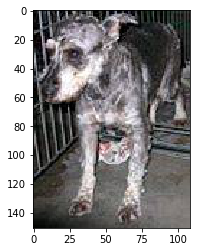

In [5]:
files = os.listdir(f'{PATH}val/dogs')
files[:5]
img = plt.imread(f'{PATH}val/dogs/{files[0]}')
plt.imshow(img)
img.shape
print(len(files))

In [6]:
from keras.preprocessing.image import ImageDataGenerator

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [7]:
batch_size=16
train_datagen = ImageDataGenerator(rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(f'{PATH}train', 
                                                    target_size=(224,224),
                                                    batch_size=batch_size,
                                                    class_mode=None, 
                                                    shuffle=False)
validation_generator = test_datagen.flow_from_directory(f'{PATH}val', target_size=(224,224))

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


## Model

In [8]:
from keras.applications import resnet50
#from keras import applications

In [9]:
resnet_model = resnet50.ResNet50(include_top=False, weights = 'imagenet')
#resnet_model = applications.VGG16(include_top=False, weights = 'imagenet')
resnet_model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

In [10]:
labels = os.listdir(f"{PATH}val")
train_data = resnet_model.predict_generator(train_generator)

In [11]:
for label in range(0, len(labels)):
    size = len(os.listdir(f'{PATH}train/' + labels[label]))
    #print(labels[label], size)
    try:
        train_labels = np.append(train_labels, [label] * size )
        #print("appending", labels[label])
    except:
        train_labels = np.array([label] * size )
        #print("created", labels[label])

        
train_labels

array([0, 0, 0, ..., 1, 1, 1])

In [12]:
validation_data = resnet_model.predict_generator(validation_generator)

In [13]:
for label in range(0, len(labels)):
    size = len(os.listdir(f'{PATH}val/' + labels[label]))
    #print(labels[label], size)
    try:
        validation_labels = np.append(validation_labels, [label] * size )
        #print("appending", labels[label])
    except:
        validation_labels = np.array([label] * size )
        #print("created", labels[label])

        
validation_labels

array([0, 0, 0, ..., 1, 1, 1])

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [15]:
model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(train_data, train_labels,
          epochs=50,
          validation_data=(validation_data, validation_labels))

    
#resnet_model.fit_generator(train_generator, epochs = 5, validation_data=validation_generator, validation_steps = 100)
#?resnet_model.evaluate()

Train on 23000 samples, validate on 2000 samples
Epoch 1/50
23000/23000 [==============================] - 3s 149us/step - loss: 0.6919 - acc: 0.5521 - val_loss: 0.7250 - val_acc: 0.5175
Epoch 2/50
23000/23000 [==============================] - 3s 122us/step - loss: 0.6706 - acc: 0.5875 - val_loss: 0.7811 - val_acc: 0.5015
Epoch 3/50
23000/23000 [==============================] - 3s 121us/step - loss: 0.6656 - acc: 0.5952 - val_loss: 0.7567 - val_acc: 0.5095
Epoch 4/50
23000/23000 [==============================] - 3s 124us/step - loss: 0.6619 - acc: 0.6018 - val_loss: 0.7772 - val_acc: 0.5030
Epoch 5/50
23000/23000 [==============================] - 3s 120us/step - loss: 0.6575 - acc: 0.6104 - val_loss: 0.8327 - val_acc: 0.5030
Epoch 6/50
23000/23000 [==============================] - 3s 124us/step - loss: 0.6541 - acc: 0.6130 - val_loss: 0.7955 - val_acc: 0.5060
Epoch 7/50
23000/23000 [==============================] - 3s 125us/step - loss: 0.6516 - acc: 0.6223 - val_loss: 0.7690 - v